In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.model_selection import train_test_split

# Labb 1 AI Machine learning advanced

Need to filter the data first since the dataset is 900mb. Looking for different ideas.

In [143]:
#This results in a more limited but reliable dataset, it can still become more restrictive and is known as cold start
min_ratings_per_movie = 500      
min_ratings_per_user = 50

#This would result in a much wider dataset but risk overwhelming the user with a plethora of unknown movies
# min_ratings_per_movie = 10
# min_ratings_per_user = 10

dtypes = {"userId": "int32", "movieId": "int32", "rating": "float32"}

movie_counts = pd.Series(dtype=int)
user_counts = pd.Series(dtype=int)

chunk_size = 10000  

df_movies = pd.read_csv(
    "data/movies.csv", usecols=["movieId", "title", "genres"], dtype={"movieId": "int32", "title": "str", "genres": "str"}
)


chunks_list = []
for chunk in pd.read_csv("data/ratings.csv", chunksize=chunk_size, dtype=dtypes):
    
    chunk_filtered = chunk[chunk["rating"] != 0]
    
    movie_counts = movie_counts.add(
        chunk_filtered["movieId"].value_counts(), fill_value=0)
    user_counts = user_counts.add(chunk_filtered["userId"].value_counts(), fill_value=0)

    chunk_filtered = chunk_filtered[
        (chunk_filtered["movieId"].isin(movie_counts[movie_counts >= min_ratings_per_movie].index)) &
        (chunk_filtered["userId"].isin(user_counts[user_counts >= min_ratings_per_user].index))
    ]
    
    chunks_list.append(chunk_filtered)
    min_user_ratings = user_counts.min()
    if min_user_ratings >= min_ratings_per_user:
        print("Minimum user ratings count >= 50 after chunk processing.")
    else:
        print(f"Minimum user ratings count ({min_user_ratings}) < 50 after chunk processing.")

df_filtered = pd.concat(chunks_list, ignore_index=True)

df_combined = pd.merge(df_filtered, df_movies, on="movieId", how="inner")

Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum user ratings count (1.0) < 50 after chunk processing.
Minimum 

In [ ]:
# Create a sample DataFrame
data = {'A': ['foo', 'bar', 'foo', 'foo', 'bar'],
        'B': ['one', 'one', 'two', 'two', 'one']}
df = pd.DataFrame(data)

# Apply value_counts() to a column
counts = df['A'].value_counts()

print(counts)

# EDA and plots!

In [131]:
df_combined

,userId,movieId,rating,timestamp,title,genres
0,1330,318,5.0,1201429432,"Shawshank Redemption, The (1994)",Crime|Drama
1,1335,318,4.5,1618605304,"Shawshank Redemption, The (1994)",Crime|Drama
2,1339,318,5.0,1117490908,"Shawshank Redemption, The (1994)",Crime|Drama
3,1342,318,0.5,1490150981,"Shawshank Redemption, The (1994)",Crime|Drama
4,1349,318,5.0,1010198234,"Shawshank Redemption, The (1994)",Crime|Drama
...,...,...,...,...,...,...
25118999,330975,8340,2.0,1091583256,Escape from Alcatraz (1979),Drama|Thriller
25119000,330975,8493,2.5,1091585709,Memphis Belle (1990),Action|Drama|War
25119001,330975,8622,4.0,1091581777,Fahrenheit 9/11 (2004),Documentary
25119002,330975,8665,3.0,1091581765,"Bourne Supremacy, The (2004)",Action|Crime|Thriller


In [132]:
# Descriptive statistics for the numeric columns
print(df_combined.describe())

# Count of unique movies and users
unique_movies = df_combined["movieId"].nunique()
unique_users = df_combined["userId"].nunique()
print(f"Number of unique movies: {unique_movies}")
print(f"Number of unique users: {unique_users}")

# Distribution of ratings
rating_counts = df_combined["rating"].value_counts().sort_index()
print(rating_counts)

# Most rated movies with movie titles
most_rated_movies_indices = df_combined["movieId"].value_counts().head(
    10).index
most_rated_movies = df_combined[df_combined["movieId"].isin(
    most_rated_movies_indices)]
most_rated_movies = most_rated_movies.groupby(
    "movieId")["title"].first()  # Get the movie title
print(most_rated_movies)

# Highest rated movies (with at least 300 ratings), including movie titles and genres
average_ratings = df_combined.groupby(
    "movieId")["rating"].agg(["mean", "count"])
average_ratings = average_ratings[average_ratings["count"] >= 300]
highest_rated_movies_indices = average_ratings.sort_values(
    by="mean", ascending=False).head(10).index
highest_rated_movies = df_combined[df_combined["movieId"].isin(highest_rated_movies_indices)][[
    "movieId", "title", "genres"]].drop_duplicates().set_index("movieId")
highest_rated_movies["average_rating"] = average_ratings["mean"]
print(highest_rated_movies.sort_values(by="average_rating", ascending=False))

# Ratings per user
ratings_per_user = df_combined["userId"].value_counts()
print(ratings_per_user.describe())

             userId       movieId        rating     timestamp
count  2.511900e+07  2.511900e+07  2.511900e+07  2.511900e+07
mean   1.776113e+05  2.362115e+04  3.573341e+00  1.267611e+09
std    9.071767e+04  4.295064e+04  1.039404e+00  2.505984e+08
min    1.330000e+03  1.000000e+00  5.000000e-01  7.896520e+08
25%    1.017210e+05  1.207000e+03  3.000000e+00  1.048912e+09
50%    1.802030e+05  2.973000e+03  4.000000e+00  1.253144e+09
75%    2.559130e+05  8.985000e+03  4.000000e+00  1.493932e+09
max    3.309750e+05  2.868970e+05  5.000000e+00  1.689842e+09
Number of unique movies: 6312
Number of unique users: 129977
rating
0.5     357726
1.0     684337
1.5     387261
2.0    1532288
2.5    1264097
3.0    4668039
3.5    3375362
4.0    6759547
4.5    2435913
5.0    3654434
Name: count, dtype: int64
movieId
260             Star Wars: Episode IV - A New Hope (1977)
296                                   Pulp Fiction (1994)
318                      Shawshank Redemption, The (1994)
356             

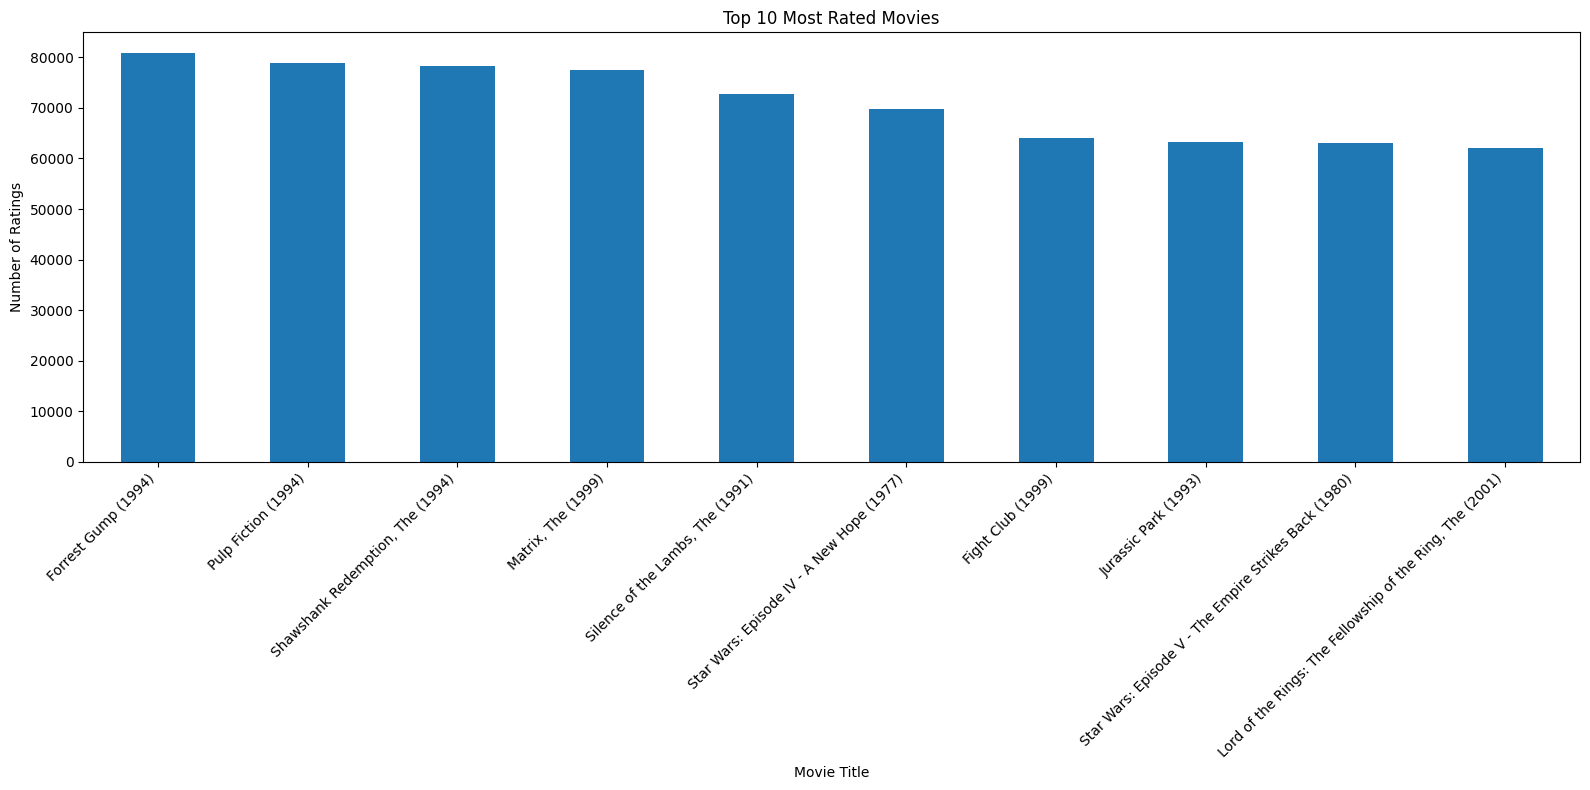

In [120]:
most_rated_movie_ids = df_combined["movieId"].value_counts().head(10).index

most_rated_movies = df_combined[df_combined["movieId"].isin(
    most_rated_movie_ids)]
most_rated_movies = most_rated_movies.groupby("movieId").first()["title"]

rating_counts = df_combined["movieId"].value_counts().loc[most_rated_movie_ids]

# Reorder the titles to match the rating_counts order
ordered_titles = most_rated_movies.reindex(rating_counts.index)

plt.figure(figsize=(16, 8))
rating_counts.plot(kind="bar")
plt.title("Top 10 Most Rated Movies")
plt.xticks(range(len(ordered_titles)), ordered_titles, rotation=45,
           ha="right")  # Set the x-ticks to be the movie titles
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.tight_layout()  # Adjust layout
plt.show()

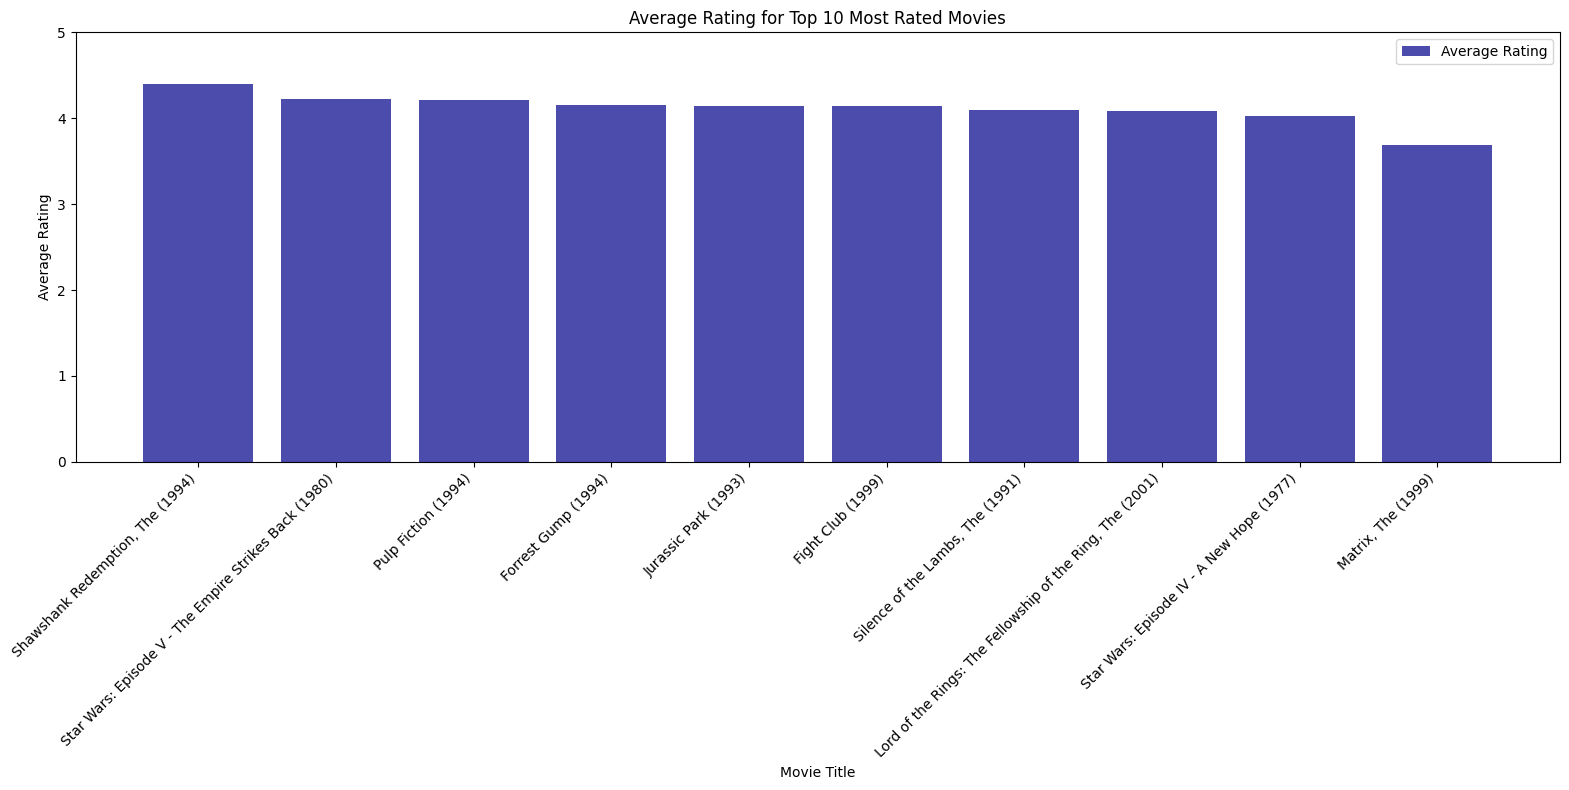

In [133]:
most_rated_movie_ids = df_combined["movieId"].value_counts().head(10).index

most_rated_movies = df_combined[df_combined["movieId"].isin(
    most_rated_movie_ids)]

most_rated_movies = most_rated_movies.groupby("movieId").first()["title"]
average_ratings = df_combined.groupby(
    "movieId")["rating"].mean().loc[most_rated_movie_ids]

most_rated_movies, average_ratings = zip(
    *sorted(zip(most_rated_movies, average_ratings), key=lambda x: x[1], reverse=True))


plt.figure(figsize=(16, 8))

plt.bar(range(len(most_rated_movies)), average_ratings,
        color='darkblue', alpha=0.7, label='Average Rating')

plt.xticks(range(len(most_rated_movies)),
           most_rated_movies, rotation=45, ha="right")
plt.xlabel("Movie Title")
plt.ylabel("Average Rating")
plt.title("Average Rating for Top 10 Most Rated Movies")
plt.ylim(0, 5) 
plt.legend()
plt.tight_layout()
plt.show()

The year release year is in the title, so i i will just slice out the last part and work from there.

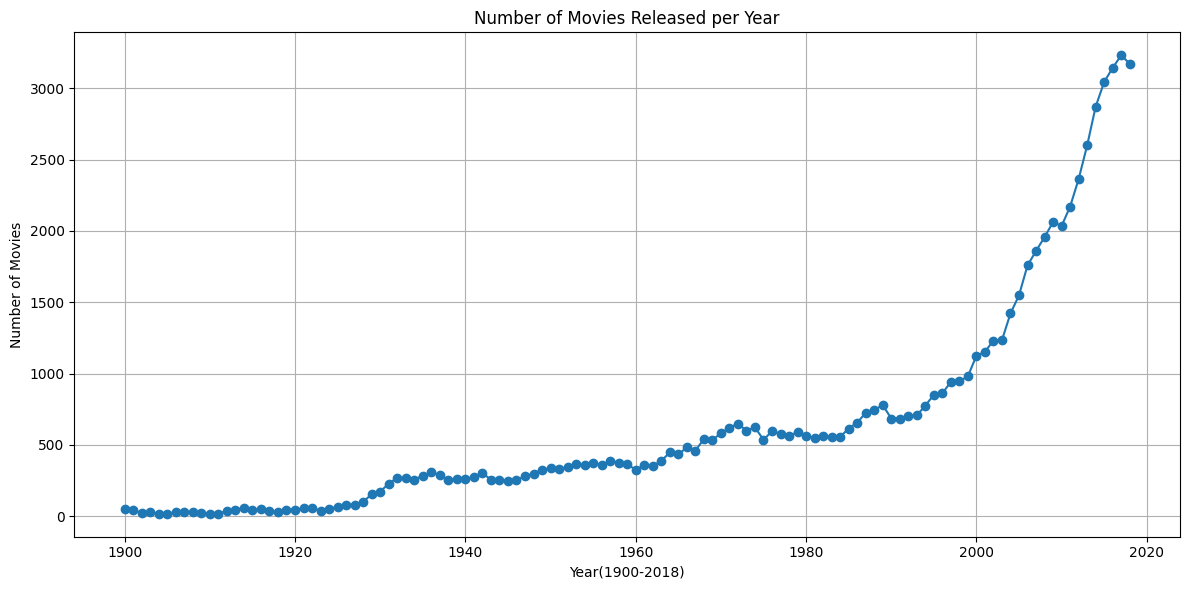

In [122]:
release_years = df_movies['title'].str[-5:-1]   #Just slice out the last part and use it.


release_years = release_years.str.extract('(\d+)').astype(float)    #Gippity

release_years = release_years[(
    release_years >= 1900) & (release_years <= 2018)]

movies_per_year = release_years[0].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values,
         marker='o', linestyle='-')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year(1900-2018)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sparse Matrix

In [134]:
user_mapper = dict(zip(np.unique(df_combined["userId"]), list(
    range(df_combined["userId"].nunique()))))
movie_mapper = dict(zip(np.unique(df_combined["movieId"]), list(
    range(df_combined["movieId"].nunique()))))

user_inv_mapper = dict(zip(
    list(range(df_combined["userId"].nunique())), np.unique(df_combined["userId"])))
movie_inv_mapper = dict(zip(list(
    range(df_combined["movieId"].nunique())), np.unique(df_combined["movieId"])))

# Create the user and item indices for the sparse matrix
user_index = [user_mapper[i] for i in df_combined["userId"]]
movie_index = [movie_mapper[i] for i in df_combined["movieId"]]

sparse_matrix = csr_matrix((df_combined["rating"], (user_index, movie_index)), shape=(
    df_combined["userId"].nunique(), df_combined["movieId"].nunique()))

In [135]:
sparse_matrix.shape
#User/Movies

(129977, 6312)

In [136]:
n_total = sparse_matrix.shape[0]*sparse_matrix.shape[1]
n_ratings = sparse_matrix.nnz

sparsity = n_ratings/n_total

print(f"Matrix Sparcity:{round(sparsity*100,2)}% ")

Matrix Sparcity:3.06% 


In [137]:
n_ratings_per_user = sparse_matrix.getnnz(axis=1)

len(n_ratings_per_user)

129977

In [138]:
n_ratings_per_user.max()

4136

In [139]:
n_ratings_per_user.min()

1

In [140]:
n_ratings_per_user.mean()

193.25729936834978